### Outline

Taking user 'company_name' input:

1- Get all rows of the company and sort them by Series from Share Type column.

2- Convert the Raised to Date, Post Money Valuation, Percent Shares Outstanding and Price Per Share columns to simple numbers. MM=Million,B=Billion,K=Thousand

3- With Share Type on X-Axis, plot multiple line plots with different colors, for Raised to Date, Post Money Valuation, Price Per Share, Percent Shares Outstanding

4- Plot 3 Scatter plots of (Raised to Date ,Post Money Valuation) and (Price Per Share,Post Money Valuation) and (Percent Shares Outstanding ,Post Money Valuation) and then find the 3 correlation coefficients.

5- Calculate percentage changes in Raised to Date, Post Money Valuation, Percent Shares Outstanding and Price Per Share and then plot those as multiple line plots and scatter plots like 3 and 4.

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [7]:
def convert_to_number(s):
    if isinstance(s, str):
        s = s.strip('$').replace(',', '').replace('%', '')
        if 'B' in s:
            return float(s.replace('B', '')) * 1e9
        elif 'MM' in s:
            return float(s.replace('MM', '')) * 1e6
        elif 'K' in s:
            return float(s.replace('K', '')) * 1e3
        else:
            return float(s)
    return s

In [8]:
def analyze_company(data, company_name):
# Filter by company name
    company_data = data[data['company_name'] == company_name].copy()
    
    # Convert financial columns to numerical values
    company_data['Raised to Date'] = company_data['Raised to Date'].apply(convert_to_number)
    company_data['Post Money Valuation'] = company_data['Post Money Valuation'].apply(convert_to_number)
    company_data['Percent Shares Outstanding'] = company_data['Percent Shares Outstanding'].str.rstrip('%').astype('float') / 100
    company_data['Issue Price'] = company_data['Issue Price'].apply(convert_to_number)
    
# Sort by Share Type
    company_data.sort_values(by='Share Type', inplace=True)
    
# Line plots for financial metrics
    plt.figure(figsize=(14, 8))
    
    for column in ['Raised to Date', 'Post Money Valuation', 'Issue Price', 'Percent Shares Outstanding']:
        sns.lineplot(data=company_data, x='Share Type', y=column, label=column)
    
    plt.title(f'{company_name} Financial Metrics by Share Type')
    plt.xlabel('Share Type')
    plt.ylabel('Value')
    plt.legend()
    plt.show()

# Scatter plots and correlation coefficients
    metrics = ['Raised to Date', 'Post Money Valuation', 'Issue Price', 'Percent Shares Outstanding']
    scatter_pairs = [
        ('Raised to Date', 'Post Money Valuation'), 
        ('Issue Price', 'Post Money Valuation'), 
        ('Percent Shares Outstanding', 'Post Money Valuation')
    ]
    corr_coef = {}
    
    for x, y in scatter_pairs:
        plt.figure(figsize=(8, 6))
        sns.scatterplot(data=company_data, x=x, y=y)
        plt.title(f'{x} vs {y}')
        plt.show()
    
        # Ensure there are no NaN values
        valid_data = company_data[[x, y]].dropna()
    
        if valid_data.shape[0] > 1:  # Ensure at least two data points
            correlation = valid_data.corr().iloc[0, 1]
            corr_coef[f'{x} vs {y}'] = correlation
        else:
            corr_coef[f'{x} vs {y}'] = 'NaN'
    
    print("Correlation Coefficients:", corr_coef)

# Calculate percentage changes and plot
    company_data_pct_change = company_data[metrics].pct_change().dropna()
    plt.figure(figsize=(14, 8))
    
    for column in metrics:
        sns.lineplot(data=company_data_pct_change, x=company_data['Share Type'][1:], y=column, label=column)
    
    plt.title(f'{company_name} Percentage Change in Financial Metrics by Share Type')
    plt.xlabel('Share Type')
    plt.ylabel('Percentage Change')
    plt.legend()
    plt.show()

    for x, y in scatter_pairs:
        plt.figure(figsize=(8, 6))
        sns.scatterplot(data=company_data_pct_change, x=x, y=y)
        plt.title(f'Percentage Change: {x} vs {y}')
        plt.show()


    

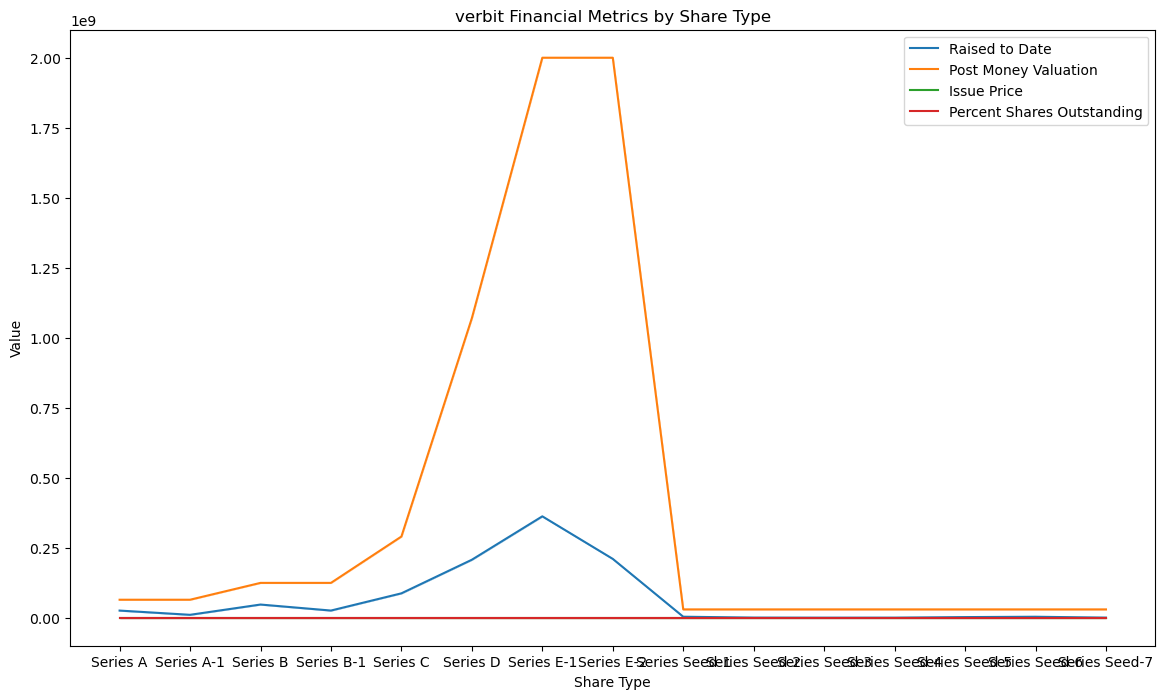

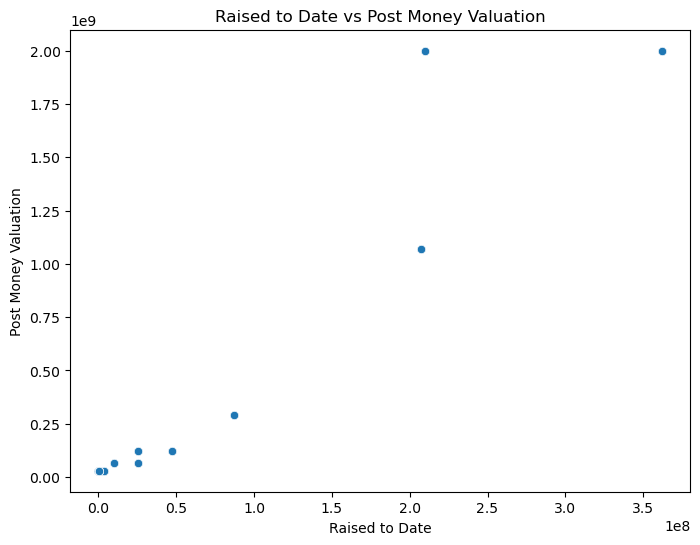

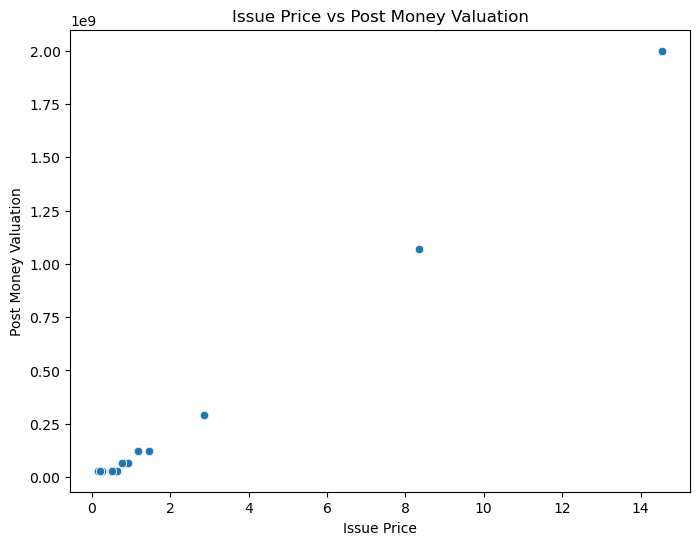

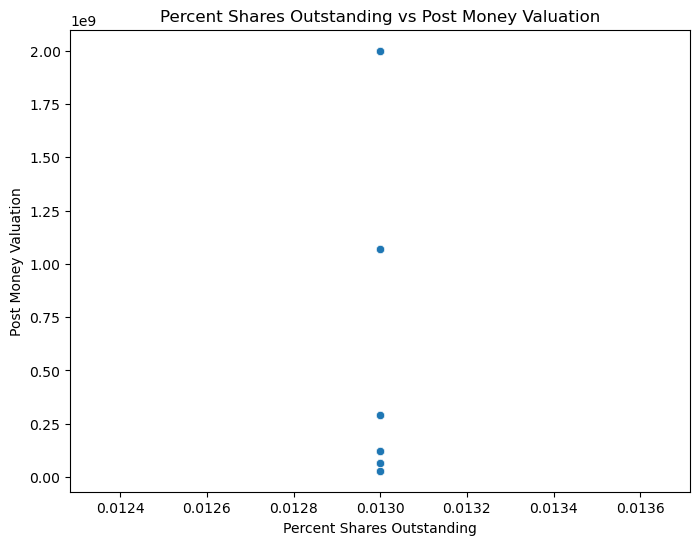

Correlation Coefficients: {'Raised to Date vs Post Money Valuation': 0.9485120473941555, 'Issue Price vs Post Money Valuation': 0.9988200225207018, 'Percent Shares Outstanding vs Post Money Valuation': nan}


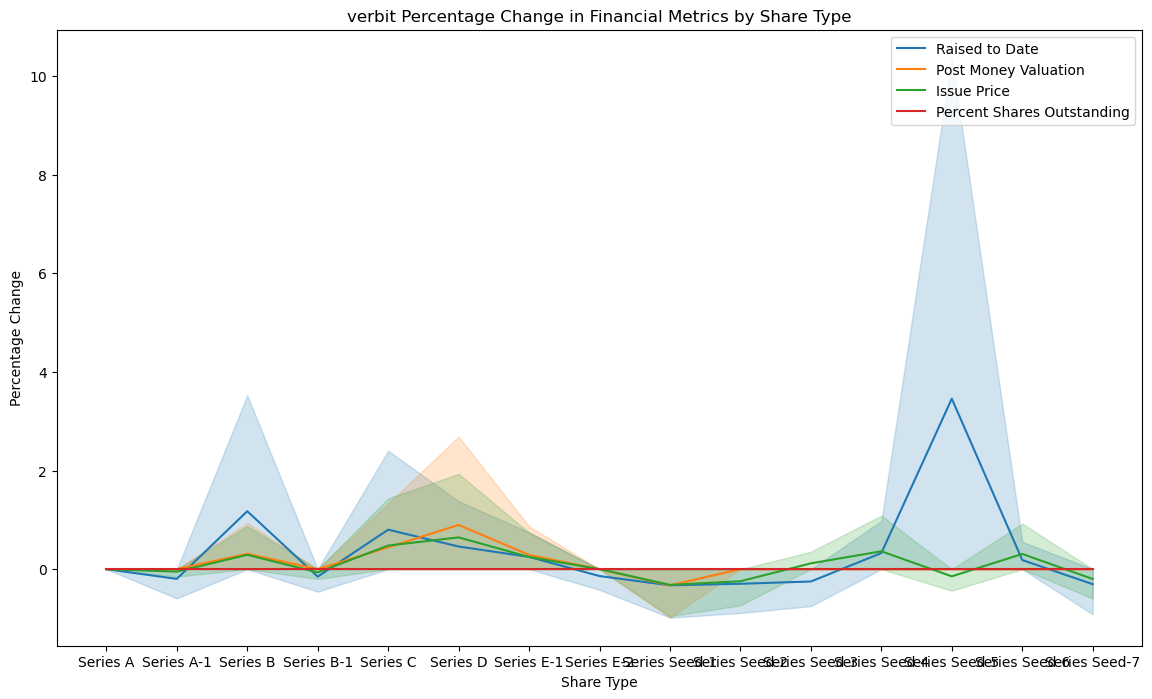

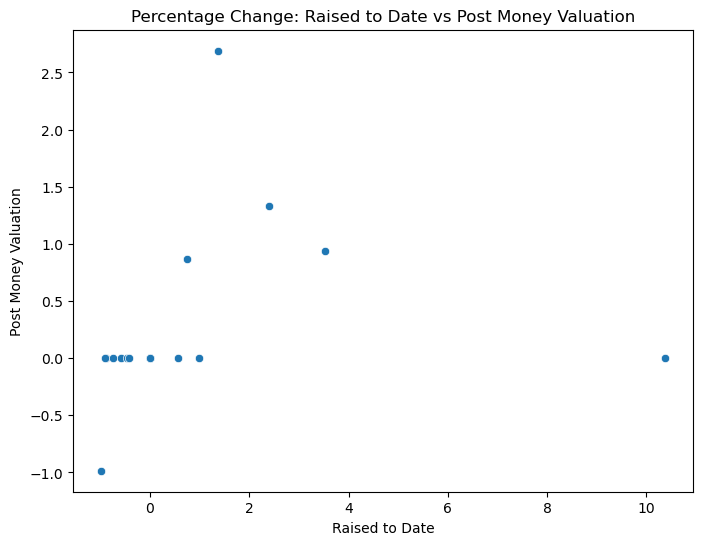

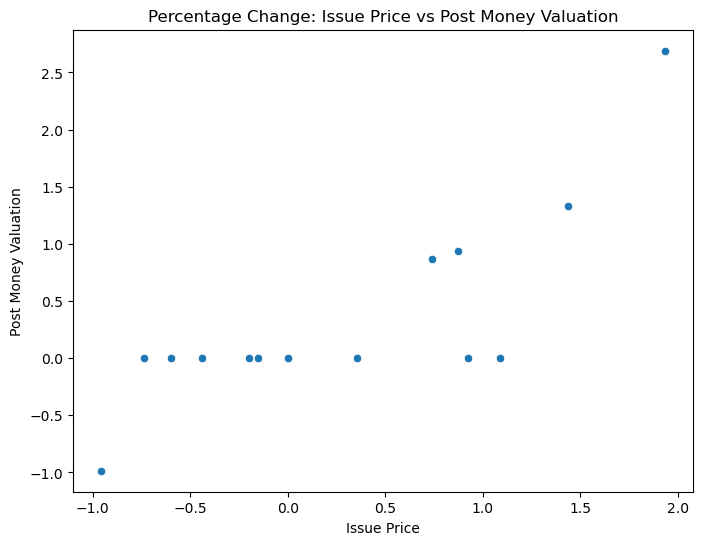

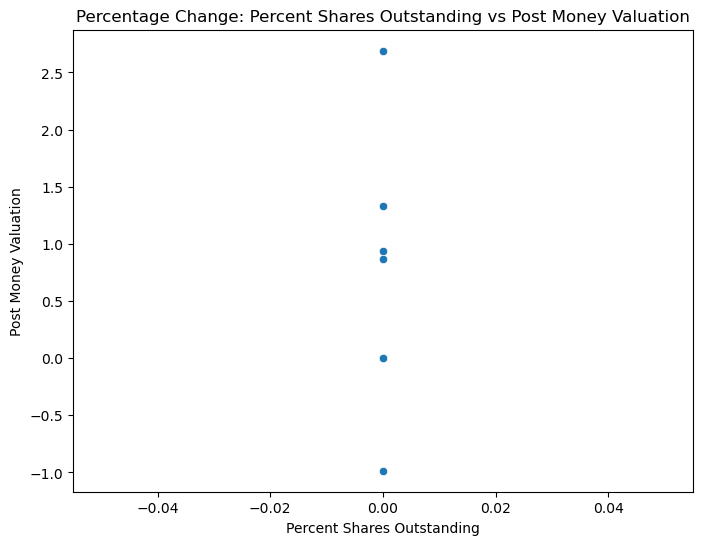

In [4]:
file_path = 'datasets/valuation_data.csv'
data = pd.read_csv(file_path)

company_name = input("Enter the company name: ")
analyze_company(data, company_name)